In [38]:
import pandas as pd # data processing
import numpy as np
#import sysmpy as sy
df = pd.read_csv("location_dataset.csv", usecols=['start','end','id_colums'],parse_dates = ['start','end'])
df = pd.DataFrame(df)
#df['intercontact'] = df.groupby(['id_colums','start','end']).apply(lambda x:x['start'] - x['end'].shift(1))
def getIntercontact(x):
    x['intercontact'] = x['start'] - x['end'].shift(1)
    #x['intercontact'] = x['intercontact'] / np.timedelta(1,H)
    return x
dfNew = df.groupby(['id_colums']).apply(getIntercontact)
dfNew['intercontact'] = dfNew['intercontact'] / np.timedelta64(1,'h')
print(dfNew)
dfNew.to_csv('Intercontact_Dataset.csv', index=False,      encoding='utf-8')

                     start                 end id_colums  intercontact
0      2004-07-19 12:04:13 2004-07-19 12:08:45       1,3           NaN
1      2004-07-19 12:37:31 2004-07-19 12:38:19       4,7           NaN
2      2004-07-19 12:38:21 2004-07-19 12:41:58       4,7      0.000556
3      2004-07-20 08:00:44 2004-07-20 08:00:55       4,5           NaN
4      2004-07-20 08:01:10 2004-07-20 08:02:48       4,5      0.004167
...                    ...                 ...       ...           ...
786296 2005-06-20 18:12:41 2005-06-20 18:56:36     14,78      0.000000
786297 2005-06-21 12:53:48 2005-06-21 12:53:53     14,78     17.953333
786298 2005-06-21 12:54:40 2005-06-21 12:54:47     14,78      0.013056
786299 2005-06-21 14:51:02 2005-06-21 14:54:18     14,78      1.937500
786300 2005-06-22 16:13:31 2005-06-22 16:13:32     18,40     54.885000

[786301 rows x 4 columns]


In [46]:
df = pd.read_csv("Intercontact_Dataset.csv", usecols=['start','id_colums', 'intercontact'],
                 index_col='start', parse_dates = ['start'])
df = pd.DataFrame(df)
#df.set_index(keys = ["start", "id_colums"])
#df = df.groupby('id_colums').resample('6H').mean().reset_index()
#df = df.reset_index()
df = df.groupby([df.index.floor("6H"), "id_colums"]).mean()
print(df)
#df.to_csv('MeanIntercontact_Dataset.csv',      encoding='utf-8')

                               intercontact
start               id_colums              
2004-07-19 12:00:00 1,3                 NaN
                    4,7            0.000556
2004-07-20 06:00:00 4,5            1.662222
                    4,7           11.430139
                    5,7            0.230455
...                                     ...
2005-06-20 06:00:00 18,40        206.688056
2005-06-20 12:00:00 14,78         15.592222
2005-06-20 18:00:00 14,78          0.449583
2005-06-21 12:00:00 14,78          6.634630
2005-06-22 12:00:00 18,40         54.885000

[137985 rows x 1 columns]


In [67]:
import re
import numpy as np
import pandas as pd # data processing
df = pd.read_csv("locationInfo.csv", parse_dates = True)
df = pd.DataFrame(df)
K = ","
pct = .apply(lambda x:  tuple(int(x) for ele in sub.split(K)) for sub in df['area id'])
df['pct'] = pct
#df['area id'] = tuple(int(ele) for ele in sub.split(K)) for sub in df['area id']
"""df['area id'] = df['area id'].convert_dtypes()
df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']',''))
#df['area id'] =[int(x) if x.isnumeric() else x for x in df['area id'] ]
pct = df['area id'].apply(lambda x: int(x)**2 )
df['pct'] = pct
def summLoc():
    return sum(2**x)
def coerce_to_float(val):
    try:
       return float(val)
    except ValueError:
       return val

df["area id"] = df["area id"].apply(lambda x: coerce_to_float(x))
for x in df['area id']:
    def res(x): return x*2
    #ans.append(res(x))
    print(df.info())"""
#df["area id"] = df["area id"].apply(lambda x: x[1])
#df["area id"] = df["area id"].str.split(",").apply(lambda x: [int(i, 16) for i in x])
print(df.tail(20))
#print(df.info())

SyntaxError: invalid syntax (<ipython-input-67-578c56189e55>, line 7)

In [23]:
import pandas as pd # data processing
import numpy as np
import re
#import sysmpy as sy
df = pd.read_csv("locationInfo.csv",usecols=['area id','id_colums'])
df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']','').replace(','," "))
df = pd.DataFrame(df)
print(df.tail(20))
df.to_csv('areaforPrepo.csv',   index=False,    encoding='utf-8')
"""#print(df.head())
#df.set_index(keys = ["start", "id_colums"])
def summLoc():
    return sum(2**x)
df = df.groupby([df.index.floor("6H"), "id_colums"]).agg({'area id': lambda x: list(set(x))})

#df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']','').replace(',',";"))
#df = df["area id"].apply(lambda x: [int(i, 16) for i in x])

#print(df.tail())
#print(df["area id"].isna().sum())
#print(df)

df['intercontact'] = df.groupby(['id_colums','start','end']).apply(lambda x:x['start'] - x['end'].shift(1))
df = df['intercontact']


Slice data and list of area id


df = pd.DataFrame(df)
#

"""
"""
df = df.groupby([df.index.floor("6H"), "id_colums"]).agg({'area id': lambda x: list(x)})

df = pd.read_csv("locationInfo.csv")
df = pd.DataFrame(df)

print(df.head())"""
#df = pd.read_csv("locationInfo.csv", usecols=['area id'])
#df = pd.DataFrame(df)
#df = df.set_index(['start','id_colums'])

#def sumList(row):
#    return sum(listRow)
#s = [str (i) for i in df['area id']]
#res = str(" ".join(s))
#print(res)
#suml  = df['area id'].to_numpy()
#df["sum"] = sum(suml)
#df['area id'] = df['area id'].astype(str).astype(int)
#es = np.sum(df['area id'].iloc[1])
#print(res)


       id_colums area id
137965     14,78      15
137966     14,78   1  15
137967     14,78      15
137968     14,78      15
137969     14,78       1
137970     14,78       1
137971     14,78      15
137972     14,78      15
137973     14,78      15
137974     14,78   1  15
137975     14,78      15
137976     14,78       1
137977     14,78      15
137978     14,78      15
137979     14,78      15
137980     18,40      75
137981     14,78      15
137982     14,78      15
137983     14,78       1
137984     18,40      75


'\ndf = df.groupby([df.index.floor("6H"), "id_colums"]).agg({\'area id\': lambda x: list(x)})\n\ndf = pd.read_csv("locationInfo.csv")\ndf = pd.DataFrame(df)\n\nprint(df.head())'

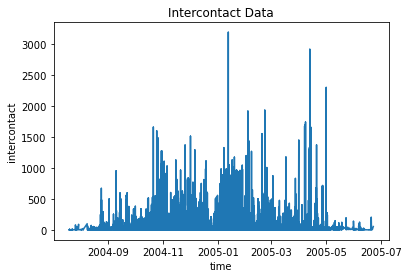

In [24]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
df = pd.read_csv("MeanIntercontact_Dataset.csv", index_col='start', parse_dates=True)

plt.xlabel("time")
plt.ylabel("intercontact")
plt.title("Intercontact Data")
plt.plot(df["intercontact"])
#df = pd.DataFrame(df)
#print(df)

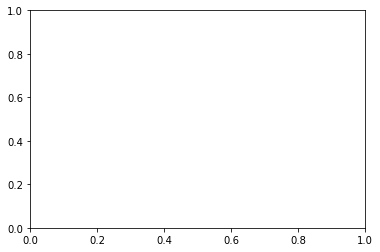

In [15]:
plt.plot(data.CLOSE)
plt.grid(False)
plt.show()